# Data samples generation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append("../lib/")

from DalitzModel import DalitzModel
from Efficiency import Detector
from PhspGen import PhspGen
from DPGen import DPGen
from PlotUtility import show_phase_space, plot_density_countours, projections

from particle import Particle

In [2]:
detector = Detector(10, 0.05, 1., 0.02)
models = []
kl, pi0, d0, ks, pip, pin = [Particle.from_pdgid(x) for x in [130, 111, 421, 310, 211, -211]]
kst0, rho770, rho770p = [Particle.from_pdgid(x) for x in [313, 113, 213]]

## Model 1: $K_L^0\to \pi^0\pi^0\pi^0$
https://arxiv.org/abs/0806.3535

https://journals.aps.org/prd/abstract/10.1103/PhysRevD.78.032009

In [3]:
models.append(DalitzModel(pi0, pi0, pi0, kl))
for key in ['AB', 'AC', 'BC']:
    models[-1].add_bw('f'+key, 0.3, 0.05, 0, key, 1.*np.exp(1j*1))
models[-1]

Phase space M -> ABC, where
  m(M) = 0.497611, m(A) = 0.134977, m(B) = 0.134977, m(C) = 0.134977

In [4]:
# show_phase_space(models[-1], 'AB', 'BC', 99)
# plot_density_countours(models[-1], 'AB', 'BC', 99)

## Model 2: $D^0\to K_S^0\pi^+\pi^-$

In [5]:
models.append(DalitzModel(ks, pip, pin, d0))
models[-1].add_bw('rho(770)', .770, .1490, 1, 'BC')
models[-1].add_bw('K*', .89166, 0.0508, 1, 'AB', 0.638*np.exp(1j*np.radians(133.2)))
models[-1]

Phase space M -> ABC, where
  m(M) = 1.86483, m(A) = 0.497611, m(B) = 0.13957061, m(C) = 0.13957061

## Model 3: $D^0\to \pi^+\pi^-\pi^0$

In [6]:
models.append(DalitzModel(pip, pin, pi0, d0))
models[-1].add_bw('rho(770)0', .770, .1490, 1, 'AB')
models[-1].add_bw('omega', .782, 0.00849, 1, 'AB', 0.008*np.exp(1j*np.radians(34.)))
models[-1].add_bw('rho(770)+', .775, .1490, 1, 'AC', 0.638*np.exp(1j*np.radians(133.2)))
models[-1].add_bw('rho(770)-', .775, .1490, 1, 'BC', 0.638*np.exp(1j*np.radians(133.2)))
models[-1]

Phase space M -> ABC, where
  m(M) = 1.86483, m(A) = 0.13957061, m(B) = 0.13957061, m(C) = 0.134977

## Data set 4: $D^+\to K^+2\pi^-$

## Data set 5: $D_s^+\to K^+K^-\pi^+$

## Data set 6: $B^0\to \overline{D}{}^0 \pi^+\pi^-$

## Model x: $B^0\to K_S^0\pi^+\pi^-$

## Data set 7: $B_s^0\to \overline{D}{}^0 K^-\pi^+$

# Countour plots

../lib/DalitzPhaseSpace.py:105: RuntimeWarning: invalid value encountered in sqrt
  return self.__energy(self.msq['M'], -mr_sq, self.other_mass_sq[rt], np.sqrt(mr_sq))
../lib/DalitzPhaseSpace.py:94: RuntimeWarning: invalid value encountered in sqrt
  return self.__energy(mr_sq, msq1, msq2, np.sqrt(mr_sq))
../lib/RelBreitWigner.py:70: RuntimeWarning: invalid value encountered in sqrt
  mass = np.sqrt(mass_sq)


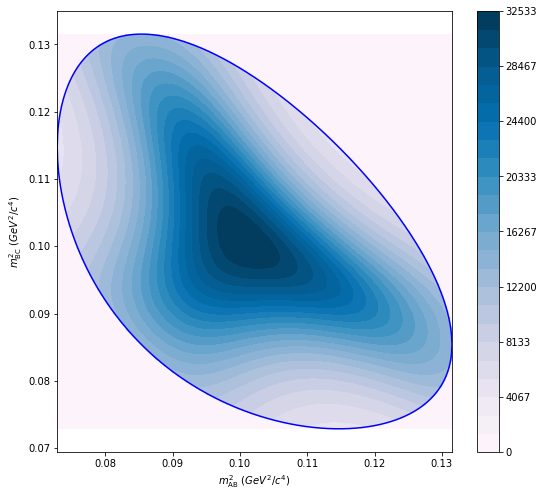

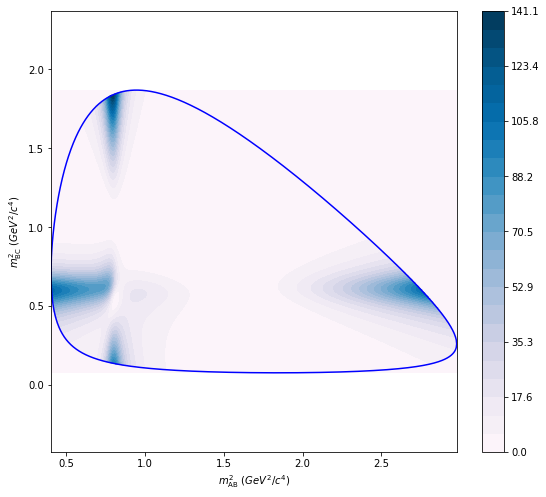

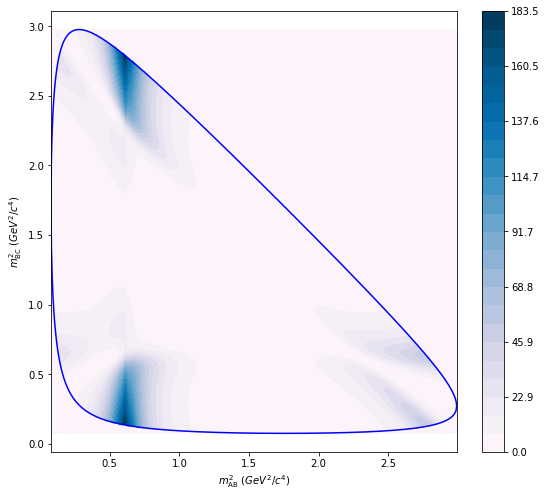

In [7]:
for idx, model in enumerate(models):
    show_phase_space(model, 'AB', 'BC', idx)
    plot_density_countours(model, 'AB', 'BC', idx)
plt.show()

# Data sets

In [13]:
idxs = list(range(len(models)))
np.random.shuffle(idxs)
print(idxs)
for idx in idxs:
    model = models[idx]
    phsp = PhspGen(model)
    phspSam = phsp(10**5)
    phspSam = phspSam[detector.effMask(phspSam)]
    
    dpgen = DPGen(model)
    genSam = dpgen(10**3)
    genSam = genSam[detector.effMask(genSam)]
    
    np.savez('../data/sample{}'.format(idx), data=genSam, phsp=phspSam)

[0, 2, 1]
0 1000
347 events generated
347 1000
1048 events generated
Efficiency: 0.524
0 1000
41 events generated
41 1000
126 events generated
126 1000
248 events generated
248 1000
411 events generated
411 1000
604 events generated
604 1000
824 events generated
824 1000
1082 events generated
Efficiency: 0.154571428571
0 1000
43 events generated
43 1000
125 events generated
125 1000
263 events generated
263 1000
441 events generated
441 1000
654 events generated
654 1000
915 events generated
915 1000
1217 events generated
Efficiency: 0.173857142857
